
# Building A Handwritten Digits Classifier

In this project, we'll:

* explore why image classification is a hard task
* build models that can classify handwritten digits.
* observe the limitations of traditional machine learning models for image classification
* train, test, and improve a few different deep neural networks for image classification


##  1. Import Data

Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of sklearn.datasets. The load_digits() function returns a copy of the [hand-written digits dataset](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) from UCI.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
                        
from sklearn.datasets import load_digits    
digits_data = load_digits() 

digits_data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
labels = pd.Series(digits_data['target'])
labels

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Length: 1797, dtype: int32

In [4]:
data = pd.DataFrame(digits_data['data'])
data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


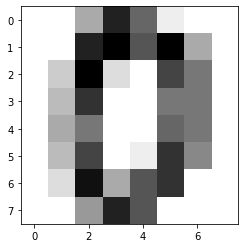

In [5]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')

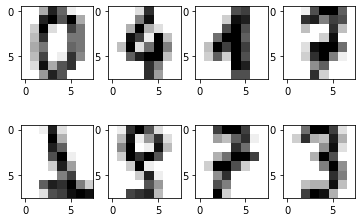

In [6]:
fig, ax = plt.subplots(2, 4)
rows =np.array([[0,100,200,300],[1000, 1100, 1200, 1300]])

for i in [0,1]:
    for j in range(4):
        ax[i,j].imshow(data.iloc[rows[i,j]].values.reshape(8,8), cmap='gray_r')

## 2. K-Nearest Neighours Model

In [7]:
# Split up the data into tran and test sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)

In [8]:
#Using KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import KFold

# traning KNN model
def train_knn(kn,X_train,y_train):
    knn = KNeighborsClassifier(n_neighbors=kn)
    knn.fit(X_train,y_train)
    return knn

# Predictions and Evaluations
def test (model, X_test, y_test):
    predictions = model.predict(X_test)
    score = accuracy_score(y_test, predictions)
    return score

# Perform n-fold cross validation 
def cross_validate(k=4, kfold=4):
    kf = KFold(n_splits= kfold, shuffle=True, random_state=1)
    kfold_accuracy = []
        
    for train_index, test_index in kf.split(data):
        X_train, X_test = data.loc[train_index], data.loc[test_index]
        y_train, y_test = labels.loc[train_index], labels.loc[test_index]
        knn = train_knn(k,X_train,y_train)
        accuracy = test(knn, X_test, y_test)
        kfold_accuracy.append(accuracy)
       
    return kfold_accuracy

knn_one_accuracies = cross_validate(4,4)
np.mean(knn_one_accuracies)

0.9849690670626082

In [9]:
k_accuracies = []
k_range = list(range(1, 10)) 

for k in k_range:
    accuracies = cross_validate (k)
    k_accuracies.append(np.mean(accuracies))
k_accuracies    

[0.9827456075228903,
 0.9805184360306854,
 0.9855283345706509,
 0.9849690670626082,
 0.9832999257609502,
 0.9805159613956941,
 0.9821863400148477,
 0.9816295471417965,
 0.9794023756495916]

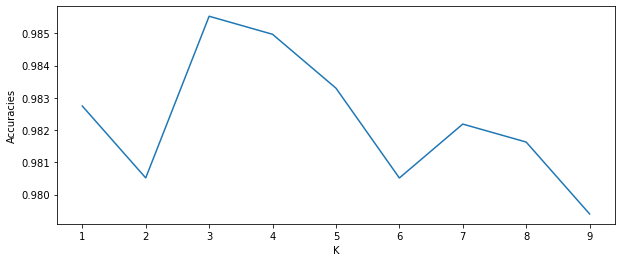

In [10]:
plt.figure(figsize=(10,4))
plt.plot(k_range, k_accuracies)
plt.xlabel("K") 
plt.ylabel("Accuracies") 
plt.plot()
plt.show()

## 4. Neural Network with One Hiddle layer

Train and test a neural network model using a single hidden layer of 8, 16,32,54,128,256 neurons.


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

# traning MLPClassifier model
def train_mlp(neuron,X_train,y_train):
    mlp = MLPClassifier(hidden_layer_sizes=neuron)
    mlp.fit(X_train,y_train)
    return mlp

# Predictions and Evaluations
def test (model, X_test, y_test):
    predictions = model.predict(X_test)
    score = accuracy_score(y_test, predictions)
    return score

# Perform n-fold cross validation 
def cross_validate(neuron= (8,), kfold=4):
    kf = KFold(n_splits= kfold, shuffle=True, random_state=1)
    accuracies = []
        
    for train_index, test_index in kf.split(data):
        X_train, X_test = data.loc[train_index], data.loc[test_index]
        y_train, y_test = labels.loc[train_index], labels.loc[test_index]
        mlp= train_mlp(neuron,X_train,y_train)
        accuracy = test(mlp, X_test, y_test)
        accuracies.append(accuracy)
    return accuracies

nn_one_accuracies = cross_validate((8,),4)

np.mean(nn_one_accuracies);

In [12]:
one_neurons = [(8,), (16,),(32,), (64,), (128,), (256,)]
nn_one_accuracies  = []

for neuron in one_neurons:
    print (str(neuron) +" neurons")
    accuracies = cross_validate (neuron)
    nn_one_accuracies.append(np.mean(accuracies))

nn_one_accuracies    

(8,) neurons
(16,) neurons
(32,) neurons
(64,) neurons
(128,) neurons
(256,) neurons


[0.8987193763919822,
 0.9499121504578075,
 0.9526924028705765,
 0.965493689680772,
 0.9716171739668398,
 0.9766245978718139]

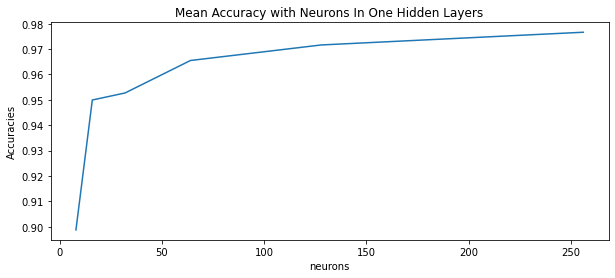

In [13]:
X =  [ x[0] for x in one_neurons]
plt.figure(figsize=(10,4))
plt.plot(X, nn_one_accuracies)
plt.xlabel("neurons") 
plt.ylabel("Accuracies") 
plt.title("Mean Accuracy with Neurons In One Hidden Layers")
plt.plot()
plt.show()    

It seems neural network is not any better than  k-nearest neighbors.

## 4. Neural Network with 2 hidden layers

In [ ]:
two_neurons = [(64,64), (128,128),(256,256)]
nn_two_accuracies = []

for neuron in two_neurons:
    print (str(neuron) +" neurons")
    accuracies = cross_validate (neuron)
    nn_two_accuracies.append(np.mean(accuracies)) 

nn_two_accuracies

(64, 64) neurons


In [ ]:
X =  [ x[0] for x in two_neurons]
plt.figure(figsize=(10,4))
plt.plot(X, nn_two_accuracies)
plt.xlabel("neurons") 
plt.ylabel("Accuracies") 
plt.title("Mean Accuracy with Neurons In Two Hidden Layers")
plt.plot()
plt.show()   


## 5. Neural Network with 3 hidden layers

In [ ]:
three_neurons = [(10,10,10), (64,64,64),(128,128,128)]
nn_three_accuracies = []

for neuron in three_neurons:
    print (str(neuron[0]) +" neurons")
    accuracies = cross_validate (neuron)
    nn_three_accuracies.append(np.mean(accuracies))

nn_three_accuracies

In [ ]:
X =  [10,64,128 ]
plt.figure(figsize=(10,4))
plt.plot(X, nn_three_accuracies)
plt.xlabel("neurons") 
plt.ylabel("Accuracies") 
plt.title("Mean Accuracy with Neurons In Three Hidden Layers")
plt.plot()
plt.show()

## 6. Decision Tree Models

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# traning decision Tree model
def train_clf(X_train,y_train):
    clf = DecisionTreeClassifier(random_state=2, min_samples_leaf=5)
    clf.fit(X_train,y_train)
    return clf

# Predictions and Evaluations
def test (model, X_test, y_test):
    predictions = model.predict(X_test)
    score = accuracy_score(y_test, predictions)
    return score

# Perform n-fold cross validation 
def cross_validate_clf(kfold=4):
    kf = KFold(n_splits= kfold, shuffle=True, random_state=1) 
    kfold_accuracy = []
        
    for train_index, test_index in kf.split(data):
        X_train, X_test = data.loc[train_index], data.loc[test_index]
        y_train, y_test = labels.loc[train_index], labels.loc[test_index]
        clf = train_clf(X_train,y_train)
        accuracy = test(clf, X_test, y_test)
        kfold_accuracy.append(accuracy)
       
    return kfold_accuracy

clf_accuracies = cross_validate_clf()

np.mean(clf_accuracies)

## 7. Random Forest Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# traning Random Forest Models
def train_clf(X_train,y_train):
    clf = RandomForestClassifier(n_estimators=150, random_state=1, min_samples_leaf=2)
    clf.fit(X_train,y_train)
    return clf

# Predictions and Evaluations
def test (model, X_test, y_test):
    predictions = model.predict(X_test)
    score = accuracy_score(y_test, predictions)
    return score

# Perform n-fold cross validation 
def cross_validate_clf(kfold=4):
    kf = KFold(n_splits= kfold, shuffle=True, random_state=1)
    kfold_accuracy = []
        
    for train_index, test_index in kf.split(data):
        X_train, X_test = data.loc[train_index], data.loc[test_index]
        y_train, y_test = labels.loc[train_index], labels.loc[test_index]
        clf = train_clf(X_train,y_train)
        accuracy = test(clf, X_test, y_test)
        kfold_accuracy.append(accuracy)
       
    return kfold_accuracy

clf_accuracies = cross_validate_clf()
np.mean(clf_accuracies)

## Conclusion:

Overall,  K-Nearest Neighours Model has the best score. Neural Network score is slightly lower.